In [1]:
import torch
from LatentPixel import TGraph, LPixelForPreTraining, ModelType
from pixel import PIXELForPreTraining
from tqdm import tqdm
ckpt = 'storage/checkpoints/lpixel_pretrain2/lpixel_pretrain/LPixelForPreTraining/20230718-020315/99000/backbone'
torch.no_grad().__enter__()

In [2]:
TGraph.init_render(240, pixels_per_patch=32)
text = 'Alice was everywhere, until she wasn’t. Just like at first, she was nowhere until she was. The absence of her before I knew she existed, was nothing. Now, the absence of her shrouds everything. Like a guest who never came to dinner; a stormy sky that didn’t deliver. Nothing can wash away the void where she used to be. This is what I’m thinking about the first time I take The Walk without her. I met Alice at a dinner party, the raucous kind with wild guests, beautiful people glittering in late summer air on a second-floor balcony backlit by a September sky. We were all friends of Richard, and this was his brilliant attempt to make all the people I love come together. Or it was a lavish birthday party thrown for himself. You could never quite tell with Richard. He was my hairdresser, but I was included among the people he loved the most, and so was Alice. From across the table, her eyes kept locking mine with interest: hers large and dark and layered with mischief. Her husband was older, serene. A balm to her boisterousness.'
text = [text]
model = LPixelForPreTraining(ModelType.SD, 0.25, [4, 4 * 529], 4, ckpt, 'storage/SD2_VQGAN/', keep_decoder=True, init_connection_layer=False)
# model.pixel.vit.embeddings.gen_mode = True

Reuse the connection layers


In [5]:
timg = TGraph.from_text(text)
timg.init_patch_mask('rand', ratio=0.25)
latent1 = model.encode(timg)
platent1 = model.predict(latent1)
lrecon1 = TGraph.reconstruct(latent1, platent1)
lrecon1.shrink_patch_mask()
platent2 = model.predict(lrecon1)
lrecon2 = TGraph.reconstruct(lrecon1, platent2)
recon1 = model.decode(lrecon1)
recon2 = model.decode(lrecon2)
recon1.patch_mask = timg.patch_mask
recon2.patch_mask = timg.patch_mask

/work/sc118/sc118/yintaotai/miniconda3/envs/pt2hfpy310/lib/python3.10/site-packages/transformers/modeling_utils.py:884: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


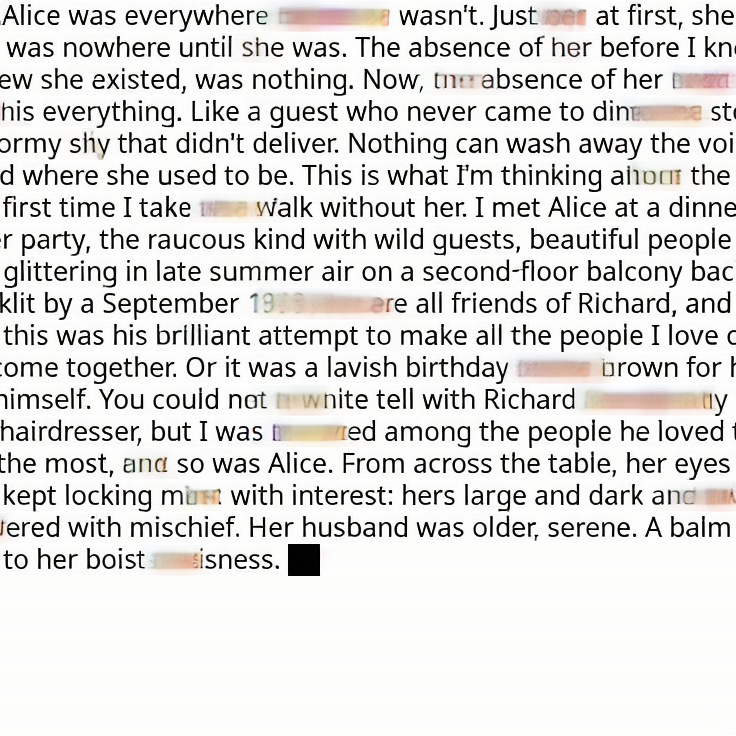

In [17]:
recon1.squarelize().to_PIL()[0]

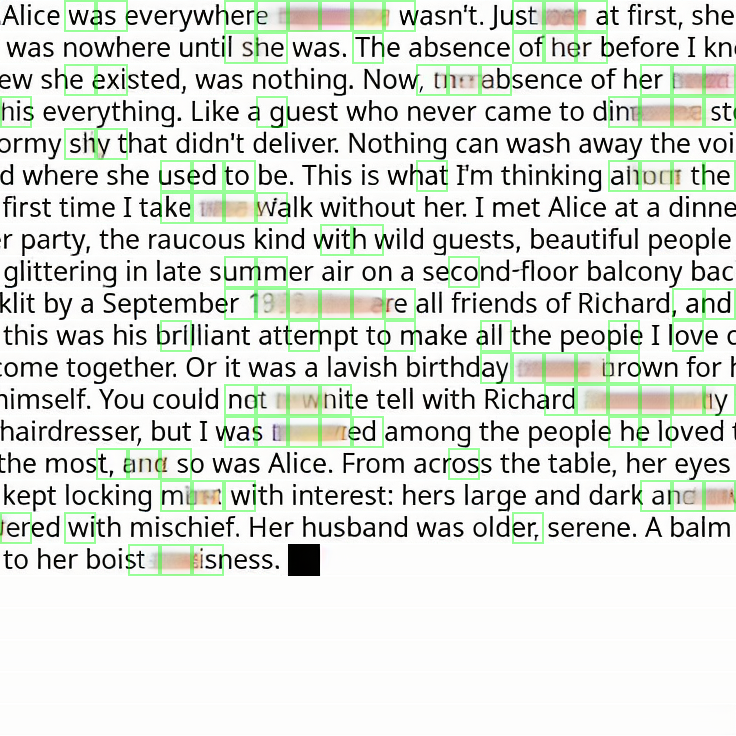

In [18]:
recon1.circle_mask('green', alpha=0.4).squarelize().to_PIL()[0]

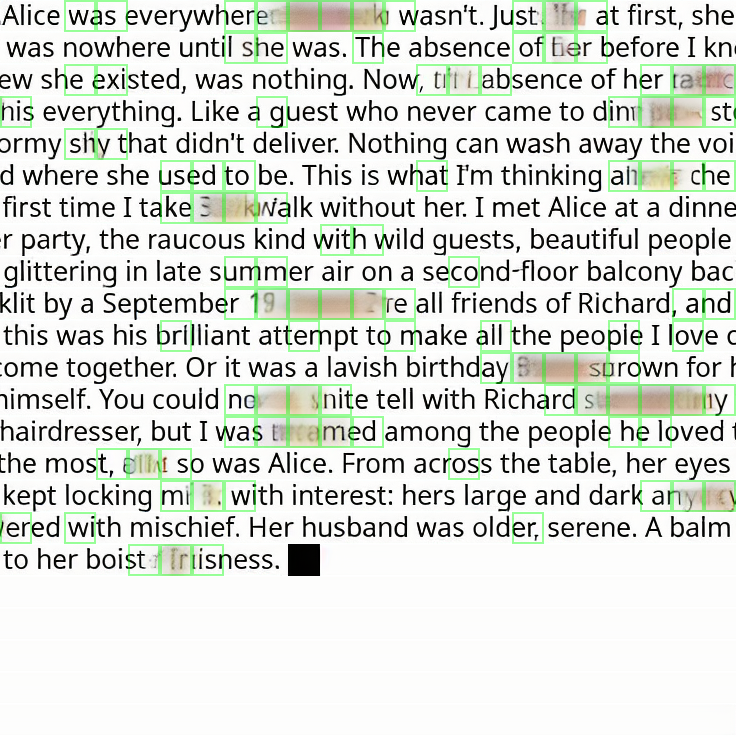

In [20]:
recon2.circle_mask('green', alpha=0.4).squarelize().to_PIL()[0]

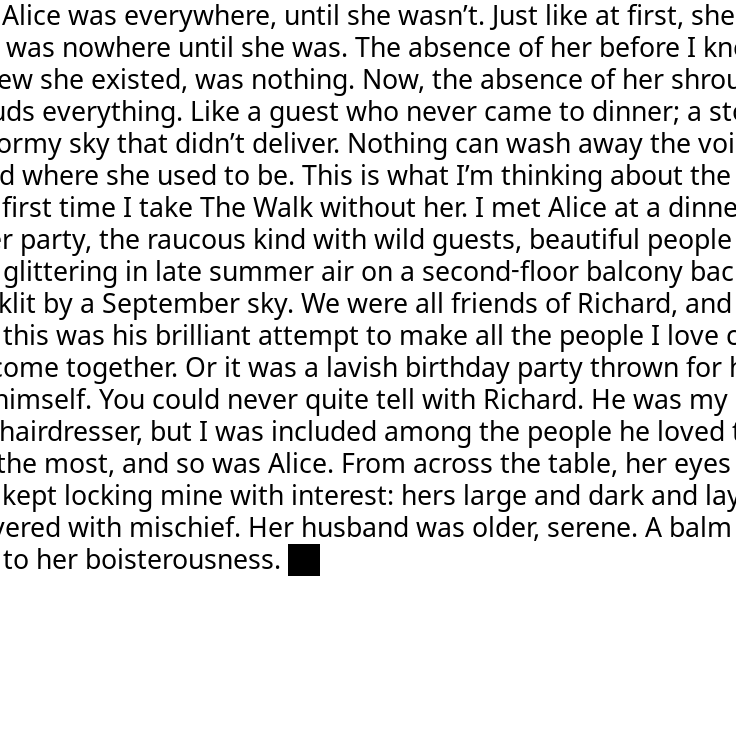

In [21]:
timg.squarelize().to_PIL()[0]

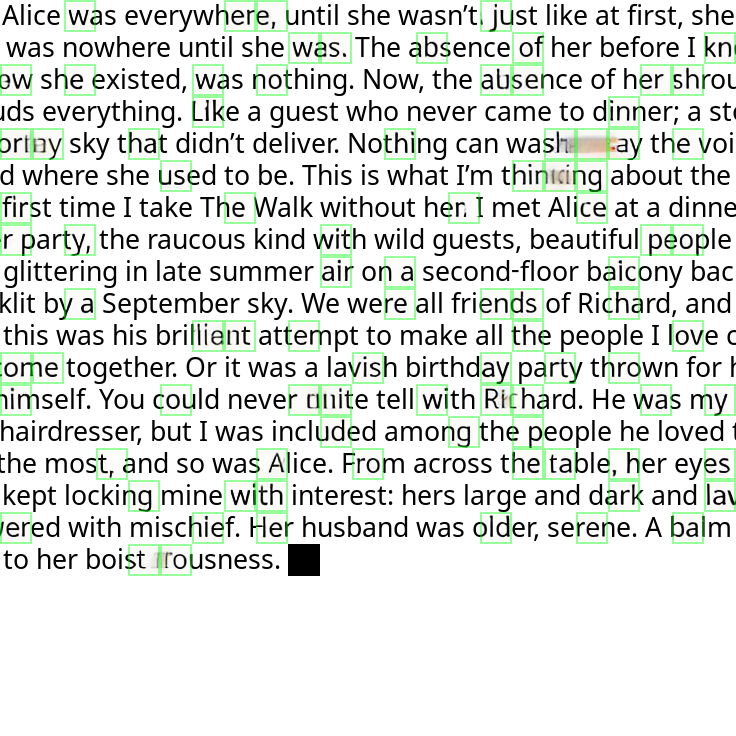

In [6]:
rrecon1 = TGraph.reconstruct(timg, recon1, True)
rrecon1.circle_mask('green', 0.4)
rrecon1.squarelize().to_PIL()[0]

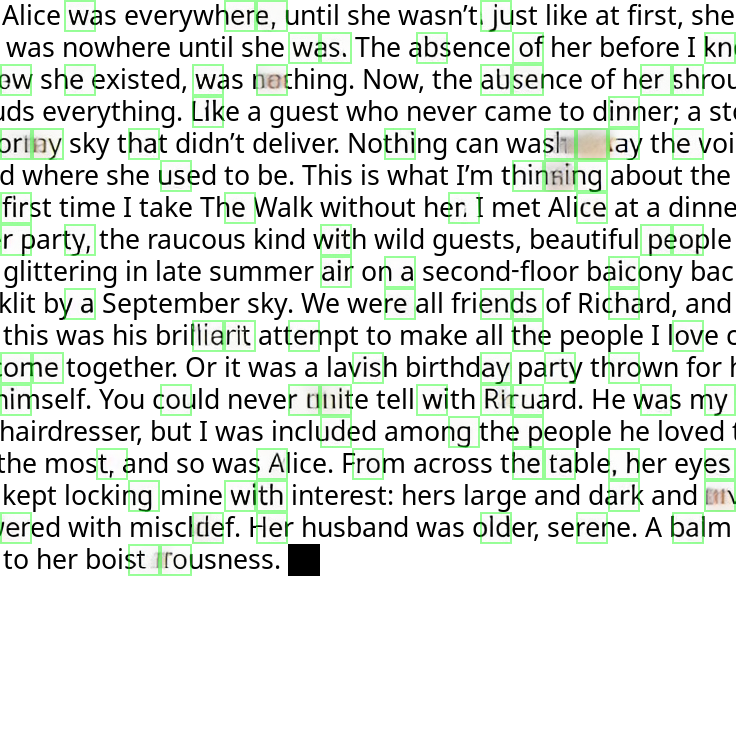

In [7]:
rrecon2 = TGraph.reconstruct(timg, recon2, True)
rrecon2.circle_mask('green', 0.4)
rrecon2.squarelize().to_PIL()[0]

In [18]:
@torch.no_grad()
def lpixel_gen(model: LPixelForPreTraining, prompt: str, idx: int, iterations: int = 1) -> TGraph:
    oidx = idx
    tmg = TGraph.from_text([prompt])
    tlatent = model.encode(tmg)
    for _ in range(iterations):
        tlatent.init_patch_mask('at', 1000, idx)
        platent = model.predict(tlatent)
        tlatent = TGraph.reconstruct(tlatent, platent)
        idx += 1
    gen = model.decode(tlatent)
    tmg.init_patch_mask('at', 1000, oidx)
    gen.init_patch_mask('at', 1000, oidx)
    gen = TGraph.reconstruct(tmg, gen)
    return gen

In [19]:
model.pixel.vit.embeddings.gen_mode = True
gen = lpixel_gen(model, text, 100, 50)

in generative_f
generative 100
in generative_f
generative 101


/work/sc118/sc118/yintaotai/miniconda3/envs/pt2hfpy310/lib/python3.10/site-packages/transformers/modeling_utils.py:884: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


in generative_f
generative 102
in generative_f
generative 103
in generative_f
generative 104
in generative_f
generative 105
in generative_f
generative 106
in generative_f
generative 107
in generative_f
generative 108
in generative_f
generative 109
in generative_f
generative 110
in generative_f
generative 111
in generative_f
generative 112
in generative_f
generative 113
in generative_f
generative 114
in generative_f
generative 115
in generative_f
generative 116
in generative_f
generative 117
in generative_f
generative 118
in generative_f
generative 119
in generative_f
generative 120
in generative_f
generative 121
in generative_f
generative 122
in generative_f
generative 123
in generative_f
generative 124
in generative_f
generative 125
in generative_f
generative 126
in generative_f
generative 127
in generative_f
generative 128
in generative_f
generative 129
in generative_f
generative 130
in generative_f
generative 131
in generative_f
generative 132
in generative_f
generative 133
in gener

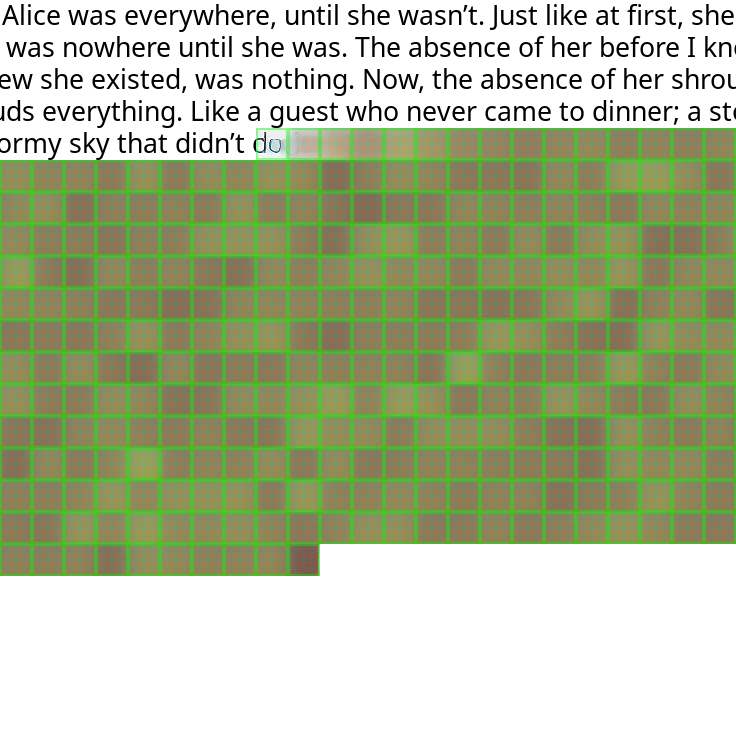

In [20]:
gen.circle_mask('green', 0.4)
gen.squarelize().to_PIL()[0]

In [17]:
gen.patch_mask.sum()

tensor(429.)

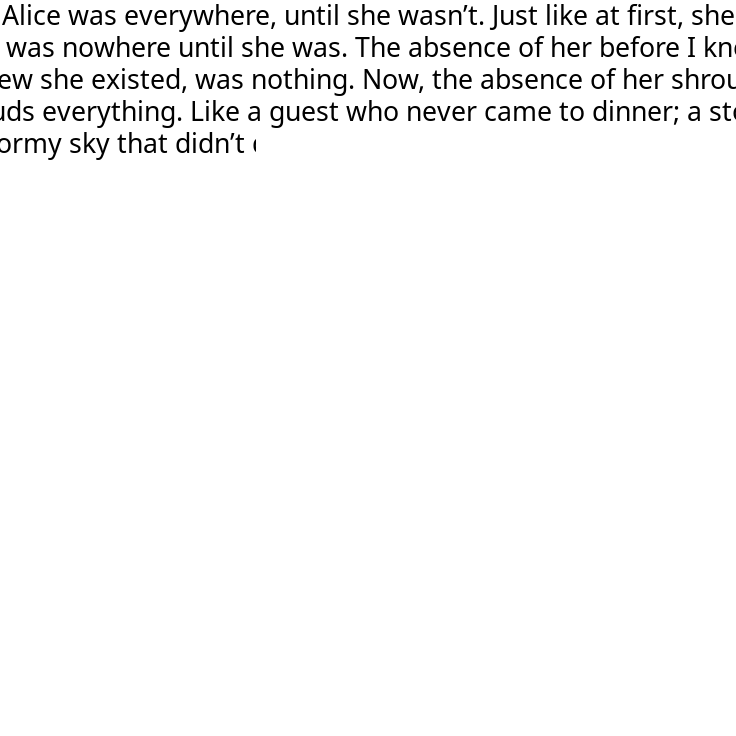

In [30]:
tgraph = TGraph.from_text(text)
tgraph.init_patch_mask('at', 1000, 100)
tgraph.paint_mask('white', 1).squarelize().to_PIL()[0]